<a href="https://colab.research.google.com/github/Aditya-1S2/shakespearePoeticGen/blob/main/Poetic_shakespeare_textgen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install keras

In [8]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Activation, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [11]:

# Load the dataset
filepath = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Preprocess the text
text = open(filepath, 'rb').read().decode(encoding='utf-8').lower()
text = text[200000:700000]  # Using a specific range for better performance

characters = sorted(set(text))
char_to_index = {c: i for i, c in enumerate(characters)}
index_to_char = {i: c for i, c in enumerate(characters)}

# Sequence parameters
SEQ_LENGTH = 42
STEP_SIZE = 3

sentences = []
next_char = []

for i in range(0, len(text) - SEQ_LENGTH, STEP_SIZE):
    sentences.append(text[i: i + SEQ_LENGTH])
    next_char.append(text[i + SEQ_LENGTH])

# Prepare input and output data
x = np.zeros((len(sentences), SEQ_LENGTH, len(characters)), dtype=np.bool_)
y = np.zeros((len(sentences), len(characters)), dtype=np.bool_)

for i, satz in enumerate(sentences):
    for t, char in enumerate(satz):
        x[i, t, char_to_index[char]] = 1
    y[i, char_to_index[next_char[i]]] = 1

# Build the model
model = Sequential()
model.add(Input(shape=(SEQ_LENGTH, len(characters))))  # Use Input layer
model.add(LSTM(128))
model.add(Dense(len(characters)))
model.add(Activation('softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.01))  # Change lr to learning_rate

# Train the model
model.fit(x, y, batch_size=256, epochs=4)

# Save the model to Google Drive
model.save('/content/drive/My Drive/shakespearetextgen.h5')  # Adjust the path as needed

Epoch 1/4
651/651 ━━━━━━━━━━━━━━━━━━━━ 124s 188ms/step - loss: 2.6564
Epoch 2/4
651/651 ━━━━━━━━━━━━━━━━━━━━ 135s 177ms/step - loss: 1.8511
Epoch 3/4
651/651 ━━━━━━━━━━━━━━━━━━━━ 139s 172ms/step - loss: 1.6572
Epoch 4/4
651/651 ━━━━━━━━━━━━━━━━━━━━ 142s 173ms/step - loss: 1.5573


In [12]:
model.save('/content/drive/My Drive/shakespearetextgen.keras')  # Adjust the path as needed

In [14]:
model = tf.keras.models. load_model ('/content/drive/MyDrive/shakespearetextgen.keras')

In [15]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

This helper function called sample is copied from the official Keras tutorial.

Link to the tutorial: https://keras.io/examples/lstm_text_generation/

In [16]:
def generate_text(length, temperature):
    start_index = random.randint(0, len(text) - SEQ_LENGTH - 1)
    generated = ''
    sentence = text[start_index: start_index + SEQ_LENGTH]
    generated += sentence
    for i in range(length):
        x_predictions = np.zeros((1, SEQ_LENGTH, len(characters)))
        for t, char in enumerate(sentence):
            x_predictions[0, t, char_to_index[char]] = 1

        predictions = model.predict(x_predictions, verbose=0)[0]
        next_index = sample(predictions,
                                 temperature)
        next_character = index_to_char[next_index]

        generated += next_character
        sentence = sentence[1:] + next_character
    return generated

In [18]:
print("------0.2------")
print(generate_text(300, 0.2))
print("------0.4------")
print(generate_text(300, 0.4))
print("------0.6------")
print(generate_text(300, 0.5))
print("------0.8------")
print(generate_text(300, 0.8))
print("------1------")
print(generate_text(300, 1))


------0.2------
oo late, i fear me, noble lord,
hath clouds of the prove the sould the soness to be the hall.

king richard iii:
and the soul, the sear the bolingbroke, and soul,
and the sent the faulest the see the death.

king richard iii:
why the same to me, the sear the souls,
and the sent the sunce and me to the sould
to me the bolingbroke and soul th
------0.4------
 for his sake pity me,
lest in revenge the god the daughter be thou art.

buckingham:
what, i persour lambence the sear the sunder.

king richard iii:
may, well, and the sear the seen and marrame.

king richard iii:
what i soul, the more me to the done the faires.

king richard iii:
why the more the stand the fall the soness
the fall the ki
------0.6------
hat murderer, which way ran he?

benvolio:

queen margaret:
i have my lord did for the more do blood,
and say the daunty the bolingbroke, but my death,
which for your fear you hendathor duke,
and marram the doad new and the dear;
that i our hear and the sungers with

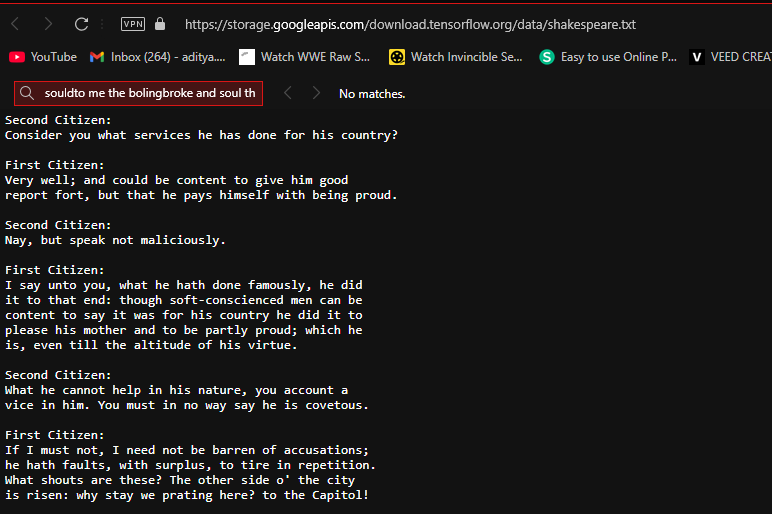